In [ ]:
  import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AXISBANK.BO (4).csv to AXISBANK.BO (4).csv


In [ ]:
df = pd.read_csv('AXISBANK.BO (4).csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
57,2021-03-22,719.950012,730.00,709.599976,716.250000,716.250000,452584
58,2021-03-23,718.250000,739.00,714.150024,730.750000,730.750000,694234
59,2021-03-24,724.500000,725.00,703.599976,706.450012,706.450012,527423
60,2021-03-25,708.000000,710.00,680.000000,694.700012,694.700012,895407
61,2021-03-26,700.099976,707.25,693.000000,697.950012,697.950012,589189


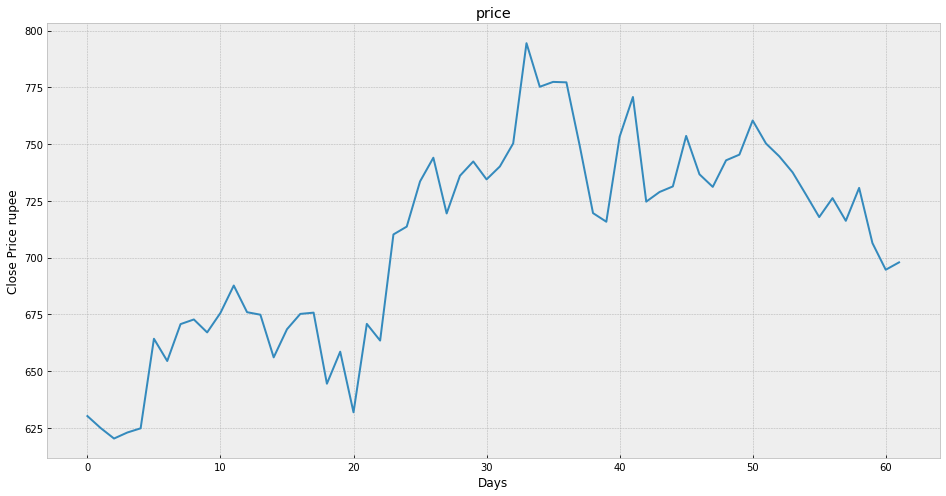

In [ ]:
plt.figure(figsize=(16,8))
plt.title('price')
plt.xlabel('Days')
plt.ylabel('Close Price rupee')
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.tail(4)

,Close
58,730.750000
59,706.450012
60,694.700012
61,697.950012


In [ ]:
future_days= 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,630.250000,733.599976
1,624.950012,744.049988
2,620.349976,719.500000
3,623.000000,736.099976


In [ ]:
X= np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[630.25    ]
 [624.950012]
 [620.349976]
 [623.      ]
 [624.849976]
 [664.299988]
 [654.5     ]
 [670.75    ]
 [672.799988]
 [667.099976]
 [675.700012]
 [687.75    ]
 [676.      ]
 [674.900024]
 [656.099976]
 [668.5     ]
 [675.25    ]
 [675.799988]
 [644.5     ]
 [658.599976]
 [631.900024]
 [670.849976]
 [663.5     ]
 [710.25    ]
 [713.700012]
 [733.599976]
 [744.049988]
 [719.5     ]
 [736.099976]
 [742.400024]
 [734.5     ]
 [740.200012]
 [750.349976]
 [794.5     ]
 [775.299988]
 [777.450012]
 [777.25    ]]


In [ ]:
y= np.array(df['Prediction'])[:-future_days]
print(y)

[733.599976 744.049988 719.5      736.099976 742.400024 734.5
 740.200012 750.349976 794.5      775.299988 777.450012 777.25
 749.349976 719.650024 715.849976 753.299988 770.799988 724.700012
 728.950012 731.400024 753.650024 736.75     731.200012 742.900024
 745.400024 760.450012 750.299988 744.650024 737.599976 727.849976
 717.900024 726.25     716.25     730.75     706.450012 694.700012
 697.950012]


In [ ]:
df[pd.isnull(df['Close'])]

,Close,Prediction


In [ ]:
df.dtypes

Close         float64
Prediction    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       62 non-null     float64
 1   Prediction  37 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df.apply(lambda df: sum (df.isnull()),axis=0)

Close          0
Prediction    25
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Close']=le.fit_transform(df['Close'])
df['Prediction']=le.fit_transform(df['Prediction'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
X_future = df.drop(['Prediction'],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[21],
       [17],
       [ 8],
       [13],
       [18],
       [20],
       [ 6],
       [ 9],
       [ 5],
       [15],
       [10],
       [26],
       [27],
       [40],
       [48],
       [31],
       [42],
       [46],
       [41],
       [45],
       [53],
       [61],
       [58],
       [60],
       [59]])

In [ ]:
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()
 
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5
 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5 719.5
 719.5]

[848.73177412 849.38758402 850.86315628 850.04339391 849.22363154
 848.8957266  851.19106123 850.69920381 851.3550137  849.71548897
 850.53525134 847.91201175 847.74805928 845.61667712 844.30505733
 847.09224938 845.28877217 844.63296228 845.45272465 844.79691475
 843.48529496 842.17367517 842.66553259 842.33762764 842.50158012]


In [ ]:
predictions = tree_prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


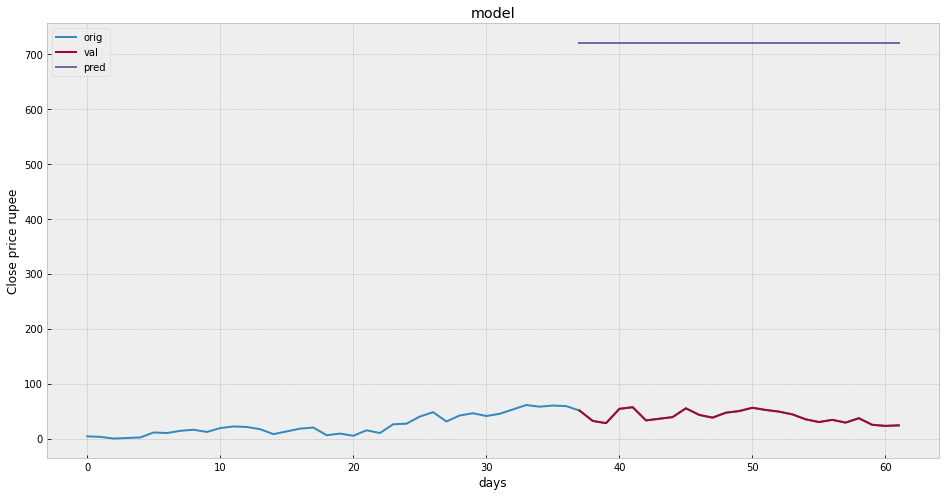

In [ ]:
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('Close price rupee')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig','val','pred'])m
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


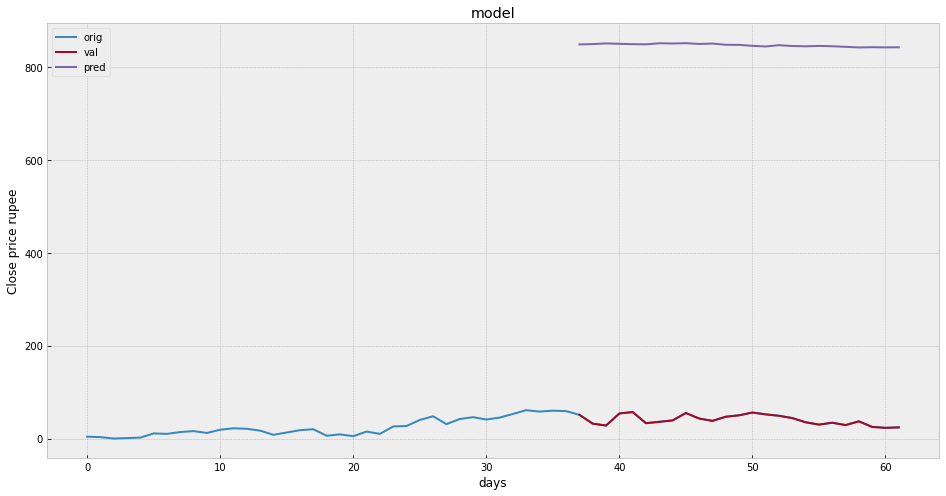

In [ ]:
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('Close price rupee')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


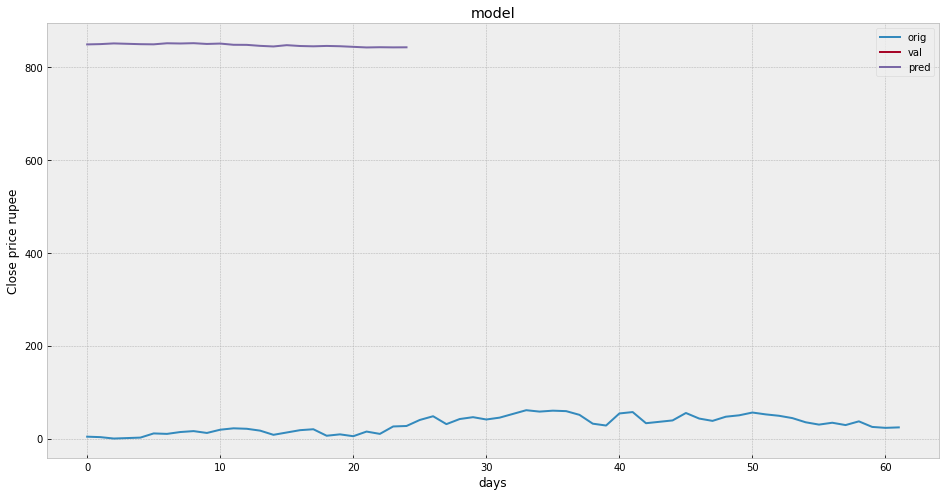

In [ ]:
predictions = lr_prediction
valid = df[df.shape[0]:]
df.loc[6,:] =10
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('Close price rupee')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

AttributeError: ignored

IndexError: ignored